In [3]:
import pandas as pd
df = pd.read_csv('/Users/mohitbagri/Desktop/aether/data/processed/cleaned_news.csv')
df.head()

,source,author,title,description,url,publishedAt
0,The Indian Express,Express News Service,Amravati chemist murder | ‘Wave of terror in s...,Khan had cited similar permissions granted to ...,https://indianexpress.com/article/cities/mumba...,2025-10-15
1,Ndtvprofit.com,PTI,Delhi High Court Issues Notice To Shah Rukh Kh...,The Delhi High Court on Wednesday issued notic...,https://www.ndtvprofit.com/nation/dl-hc-wankhe...,2025-10-08
2,The Times of India,PTI,Delhi HC questions Sameer Wankhede over mainta...,The Delhi High Court has questioned IRS office...,https://economictimes.indiatimes.com/news/indi...,2025-09-26
3,The Indian Express,Sports Desk,Ranji Trophy 2025-26 Squad: Full list of playe...,"Ranji Trophy 2025-26 Squad, Players List: Chec...",https://indianexpress.com/article/sports/crick...,2025-10-13
4,Sambad.in,Monalisha Parida,"୭୧ତମ ଜାତୀୟ ଚଳଚ୍ଚିତ୍ର ପୁରସ୍କାର: ଶାହରୁଖ, ବିକ୍ରାନ...",ଆଜି ଅପରାହ୍ନ ୪ଟାରେ ଦିଲ୍ଲୀର ବିଜ୍ଞାନ ଭବନରେ ଜାତୀୟ ...,https://sambad.in/entertainment/shah-rukh-khan...,2025-09-23


In [4]:
print(len(df))

5


In [5]:
print(df["source"].value_counts().head(10))

source
The Indian Express    2
Ndtvprofit.com        1
The Times of India    1
Sambad.in             1
Name: count, dtype: int64


In [6]:
print(df.describe   ())

                    source author  \
count                    5      5   
unique                   4      4   
top     The Indian Express    PTI   
freq                     2      2   

                                                    title  \
count                                                   5   
unique                                                  5   
top     Amravati chemist murder | ‘Wave of terror in s...   
freq                                                    1   

                                              description  \
count                                                   5   
unique                                                  5   
top     Khan had cited similar permissions granted to ...   
freq                                                    1   

                                                      url publishedAt  
count                                                   5           5  
unique                                                  5 

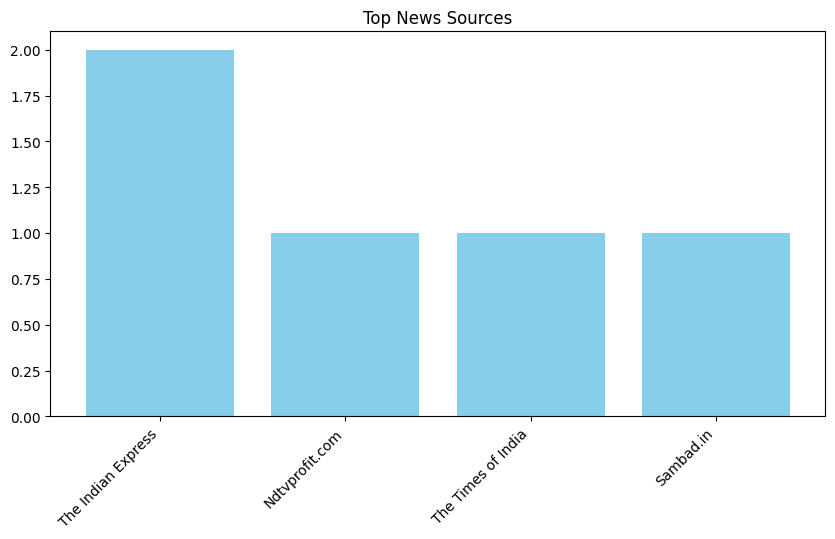

In [7]:
import matplotlib.pyplot as plt

top_sources = df['source'].value_counts().head(10)
plt.figure(figsize=(10,5))
plt.bar(top_sources.index, top_sources.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top News Sources")
plt.show()


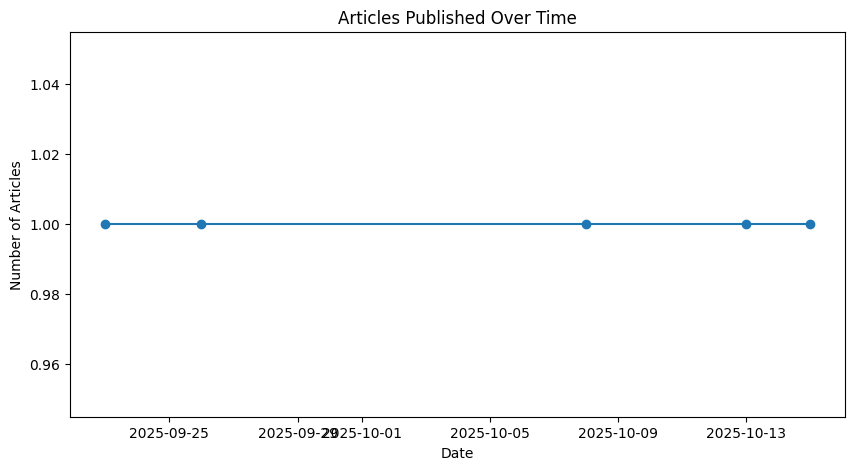

In [8]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
articles_per_day = df.groupby(df['publishedAt'].dt.date).size()

plt.figure(figsize=(10,5))
plt.plot(articles_per_day.index, articles_per_day.values, marker='o')
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()


/var/folders/ml/zpv7pq2134g63mrydvjz8_q40000gn/T/ipykernel_20952/225102816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['source'], order=df['source'].value_counts().index[:10], palette='viridis')


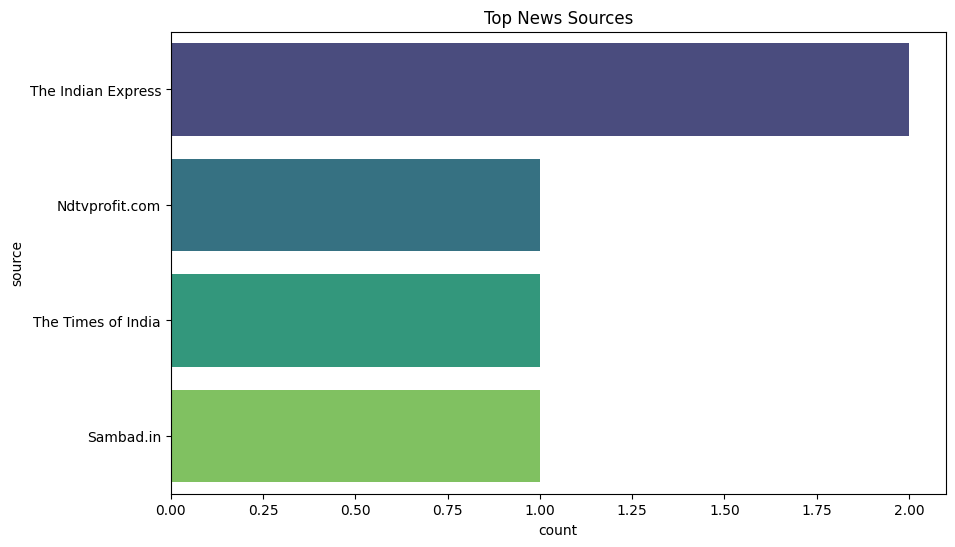

In [9]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(y=df['source'], order=df['source'].value_counts().index[:10], palette='viridis')
plt.title("Top News Sources")
plt.show()


In [10]:
import plotly.express as px

# Top sources interactive
fig = px.bar(top_sources, x=top_sources.index, y=top_sources.values,
             title="Top News Sources (Interactive)",
             labels={"x":"Source","y":"Article Count"})
fig.show()

# Articles over time interactive
fig = px.line(articles_per_day, title="Articles Published Over Time")
fig.show()
